In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('synthetic_vehicle_safety_data.csv')
data

,Vehicle_Speed,Object_Distance,Object_Velocity,Object_Type,Weather_Condition,Road_Condition,Safety,Unnamed: 7
0,57.454012,7.985773,32.101582,0,1,1,0,58.801533
1,115.071431,65.458989,4.206998,1,1,0,0,118.506147
2,93.199394,34.863818,8.081436,2,0,1,1,95.456527
3,79.865848,53.314216,44.927709,2,2,0,1,79.098169
4,35.601864,91.218815,30.321453,2,1,1,1,35.903066
...,...,...,...,...,...,...,...,...
95,69.379560,38.174910,26.112163,1,1,0,1,65.749785
96,72.273283,73.965789,38.499678,2,0,0,1,67.707261
97,62.754102,90.225475,10.791051,0,0,0,1,57.779604
98,22.541913,89.273210,31.144524,0,1,0,1,19.787991


In [3]:
if 'Unnamed: 7' in data.columns:
    data = data.drop(columns=['Unnamed: 7'])

In [4]:
x=data.drop(columns=['Safety'])

In [6]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [7]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)

In [8]:
pca_df=pd.DataFrame(x_pca,columns=['PCA1','PCA2'])

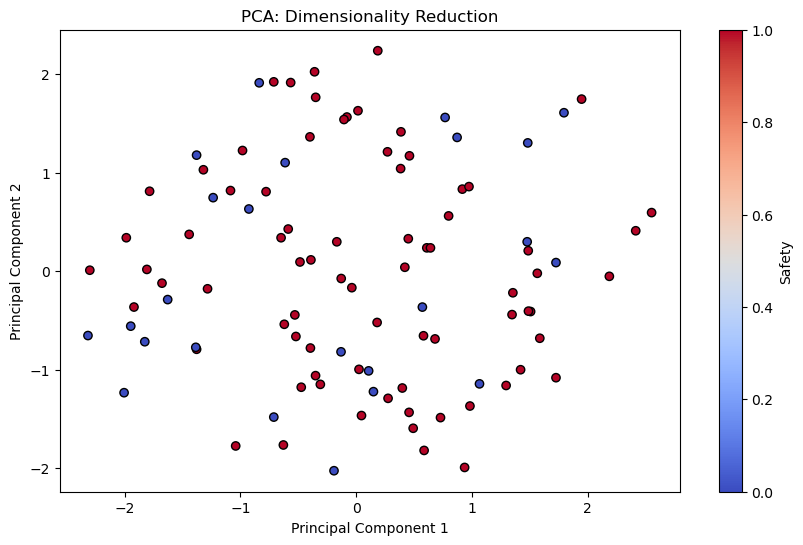

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=data['Safety'], cmap='coolwarm', edgecolor='k')
plt.title('PCA: Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Safety')
plt.show()

In [12]:
explained_variance=pca.explained_variance_ratio_
print(f'Explained variance by PCA components: {explained_variance}')

Explained variance by PCA components: [0.21574537 0.19376203]
